In [2]:
import statistics
import scipy as sp
import numpy as np
import pandas as pd

In [1]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import plotly.figure_factory as ff

<h1> <font color = "#FF4500"; size = 20> Correlation Analysis</font> </h1>

<div class="alert alert-block alert-info"><font size = 3; face = "verdana"><b>Definition: </b> Correlation</font>
    <hr>
    <font color = "#353535"; face = "Times"> Correlation refers to a statistical measure that quantifies the degree to which two variables are related or associated with each other. In other words, it helps assess the extent to which changes in one variable coincide with or can be predicted from changes in another variable. Correlation does not imply causation; it only indicates a relationship between variables.</font>
</div>

<div class="alert alert-block alert-info"><font size = 3; face = "verdana"><b>Definition: </b> Correlation coefficiant</font>
    <hr>
    <font color = "#353535"; face = "Times"> A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables.</font>
</div>

<table style=";margin-left: auto; margin-right: auto;" class="kb-table responsive alternate">
<thead>
<tr>
<th>Correlation coefficient</th>
<th>Correlation strength</th>
<th>Correlation type</th>
</tr>
</thead>
<tbody>
<tr>
<td>-.7 to -1</td>
<td>Very strong</td>
<td>Negative</td>
</tr>
<tr>
<td>-.5 to -.7</td>
<td>Strong</td>
<td>Negative</td>
</tr>
<tr>
<td>-.3 to -.5</td>
<td>Moderate</td>
<td>Negative</td>
</tr>
<tr>
<td>0 to -.3</td>
<td>Weak</td>
<td>Negative</td>
</tr>
<tr>
<td>0</td>
<td>None</td>
<td>Zero</td>
</tr>
<tr>
<td>0 to .3</td>
<td>Weak</td>
<td>Positive</td>
</tr>
<tr>
<td>.3 to .5</td>
<td>Moderate</td>
<td>Positive</td>
</tr>
<tr>
<td>.5 to .7</td>
<td>Strong</td>
<td>Positive</td>
</tr>
<tr>
<td>.7 to 1</td>
<td>Very strong</td>
<td>Positive</td>
</tr>
</tbody>
</table>

<h2><font size = 5; face = "verdana">Types of Correlation Analysis</font></h2>
<hr>

<table class="kb-table responsive full-width alternate">
<thead>
<tr>
<th>Correlation coefficient</th>
<th>Type of relationship</th>
<th>Levels of measurement</th>
<th>Data distribution</th>
</tr>
</thead>
<tbody>
<tr>
<th>Pearson’s r</th>
<td>Linear</td>
<td>Two quantitative (interval or ratio) variables</td>
<td>Normal distribution</td>
</tr>
<tr>
<th>Spearman’s rho</th>
<td>Non-linear</td>
<td>Two, interval or ratio variables</td>
<td>Any distribution</td>
</tr>
<tr>
<th>Point-biserial</th>
<td>Linear</td>
<td>One dichotomous (binary) variable and one quantitative (interval</a> or ratio) variable</td>
<td>Normal distribution</td>
</tr>
<tr>
<th>Cramér’s V (Cramér’s φ)</th>
<td>Non-linear</td>
<td>Two nominal variables</a></td>
<td>Any distribution</td>
</tr>
<tr>
<th>Kendall’s tau</th>
<td>Non-linear</td>
<td>Two ordinal, interval or ratio variables</a></td>
<td>Any distribution</td>
</tr>
</tbody>
</table>

<div class="alert alert-block alert-warning"><h2> <font face = "Gothic">1. Pearson's r correlation analysis

The Pearson’s product-moment correlation coefficient, also known as Pearson’s r, describes the linear relationship between two quantitative variables.

These are the assumptions your data must meet if you want to use Pearson’s r:

- Both variables are on an interval or ratio level of measurement
- Data from both variables follow normal distributions
- Your data have no outliers
- Data from a random or representative sample
- Expect a linear relationship between the two variables

The Pearson’s r is a parametric test, so it has high power. But it’s not a good measure of correlation if variables have a nonlinear relationship, or if data have outliers, skewed distributions, or come from categorical variables. If any of these assumptions are violated, we should consider a rank correlation measure.

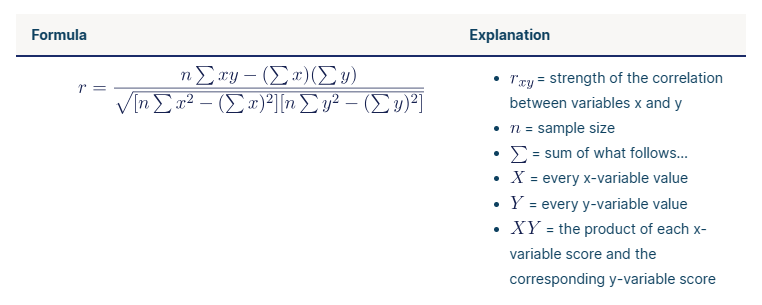

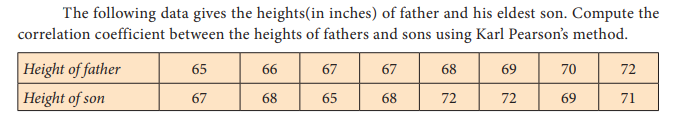

In [3]:
x = [65,66,67,67,68,69,70,72]
y = [67,68,65,68,72,72,69,71]

In [7]:
trace = go.Scatter(x = x, y = y, name = 'r', mode = 'markers', marker = dict(size = 10))

fig = go.Figure(data = [trace], layout = dict(title = "Correlation", 
                                              xaxis = dict(title = "Sample 1"), yaxis = dict(title = "Sample 2")))

fig.show()

In [8]:
np.corrcoef(x, y)

array([[1.        , 0.60302269],
       [0.60302269, 1.        ]])

In [36]:
def Pr(x,y):
    num = (len(x)*sum([i*j for i,j in zip(x,y)])-sum(x)*sum(y))
    den = np.sqrt(((len(x)*sum([i**2 for i in x])) - (sum(x))**2) * ((len(y)*sum([i**2 for i in y])) - (sum(y))**2))
    return num/den

In [37]:
np.array([[Pr(x,x), Pr(x,y)],[Pr(y,x), Pr(y,y)]])

array([[1.        , 0.60302269],
       [0.60302269, 1.        ]])

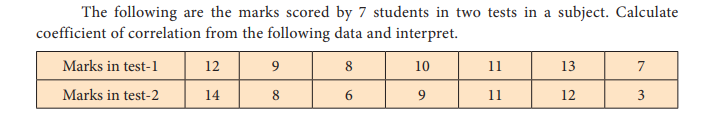

In [38]:
x = [12,9,8,10,11,13,7]
y = [14,8,6,9,11,12,3]

In [39]:
trace = go.Scatter(x = x, y = y, name = 'r', mode = 'markers', marker = dict(size = 10))

fig = go.Figure(data = [trace], layout = dict(title = "Correlation", 
                                              xaxis = dict(title = "Sample 1"), yaxis = dict(title = "Sample 2")))

fig.show()

In [40]:
np.corrcoef(x,y)

array([[1.        , 0.94850401],
       [0.94850401, 1.        ]])

In [41]:
Pr(x,y)

0.9485040136686708

<div class="alert alert-block alert-warning"><h2> <font face = "Gothic">2. Spearman’s rank correlation coefficient ($\rho$)

Spearman’s rho, or Spearman’s rank correlation coefficient, is the most common alternative to Pearson’s r. It’s a rank correlation coefficient because it uses the rankings of data from each variable (e.g., from lowest to highest) rather than the raw data itself.

The Spearman’s rho is used when data fail to meet the assumptions of Pearson’s r. This happens when at least one of variables is on an ordinal level of measurement or when the data from one or both variables do not follow normal distributions.

While the Pearson correlation coefficient measures the linearity of relationships, the Spearman correlation coefficient measures the monotonicity of relationships.

In a linear relationship, each variable changes in one direction at the same rate throughout the data range. In a monotonic relationship, each variable also always changes in only one direction but not necessarily at the same rate.

- Positive monotonic: when one variable increases, the other also increases.
- Negative monotonic: when one variable increases, the other decreases.

Monotonic relationships are less restrictive than linear relationships.

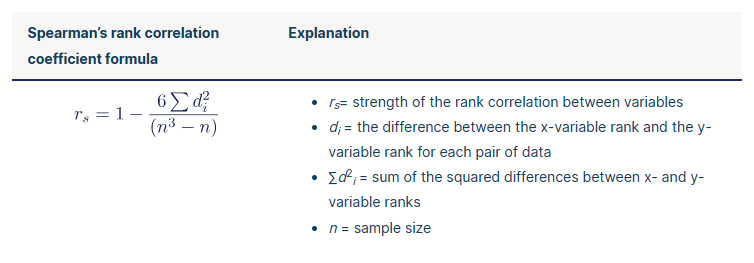

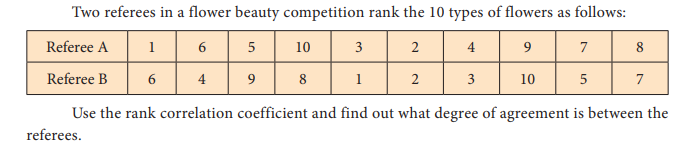

In [47]:
x = [1,6,5,10,3,2,4,9,7,8]
y = [6,4,9,8,1,2,3,10,5,7]

In [48]:
trace = go.Scatter(x = x, y = y, name = 'r', mode = 'markers', marker = dict(size = 10))

fig = go.Figure(data = [trace], layout = dict(title = "Correlation", 
                                              xaxis = dict(title = "Sample 1"), yaxis = dict(title = "Sample 2")))

fig.show()

In [43]:
sp.stats.spearmanr(x,y)

SignificanceResult(statistic=0.6363636363636362, pvalue=0.04791172612997547)

Since the p-value of the correlation is less than 0.05, the correlation is statistically significant.

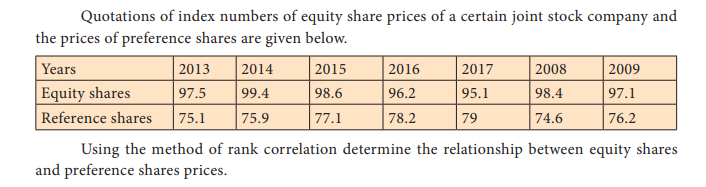

In [54]:
df = pd.DataFrame({'Years': [2013,2014,2015,2016,2017,2008,2009],
                   'Equity shares': [97.5,99.4,98.6,96.2,95.1,98.4,97.1],
                   'Reference shares': [75.1,75.9,77.1,78.2,79,74.6,76.2]})
df

,Years,Equity shares,Reference shares
0,2013,97.5,75.1
1,2014,99.4,75.9
2,2015,98.6,77.1
3,2016,96.2,78.2
4,2017,95.1,79.0
5,2008,98.4,74.6
6,2009,97.1,76.2


In [55]:
df = df.sort_values('Years')
df

,Years,Equity shares,Reference shares
5,2008,98.4,74.6
6,2009,97.1,76.2
0,2013,97.5,75.1
1,2014,99.4,75.9
2,2015,98.6,77.1
3,2016,96.2,78.2
4,2017,95.1,79.0


In [52]:
trace = go.Scatter(x = df['Equity shares'], y = df['Reference shares'], name = 'r', mode = 'markers', marker = dict(size = 10))

fig = go.Figure(data = [trace], layout = dict(title = "Correlation", 
                                              xaxis = dict(title = "Sample 1"), yaxis = dict(title = "Sample 2")))

fig.show()

In [50]:
sp.stats.spearmanr(df["Equity shares"], df["Reference shares"])

SignificanceResult(statistic=-0.6071428571428572, pvalue=0.1482311614811614)

<div class="alert alert-block alert-warning"><h2> <font face = "Gothic">3. Coefficient of determination

When you square the correlation coefficient, you end up with the correlation of determination ($r2$). This is the proportion of common variance between the variables. The coefficient of determination is always between 0 and 1, and it’s often expressed as a percentage.


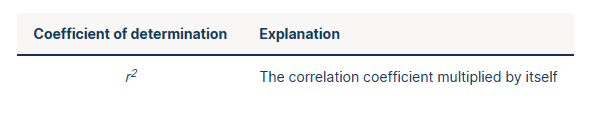

A high $r^2$ means that a large amount of variability in one variable is determined by its relationship to the other variable. A low $r^2$ means that only a small portion of the variability of one variable is explained by its relationship to the other variable; relationships with other variables are more likely to account for the variance in the variable.

The correlation coefficient can often overestimate the relationship between variables, especially in small samples, so the coefficient of determination is often a better indicator of the relationship.

In [56]:
(-0.6071428571428572)**2

0.3686224489795919

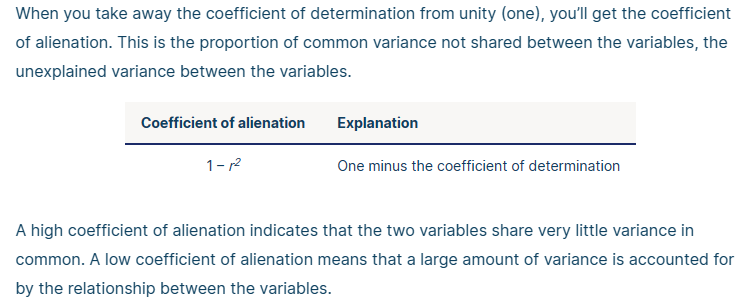

In [57]:
1 - (-0.6071428571428572)**2

0.631377551020408